<a href="https://colab.research.google.com/github/liorcunusaa/Data-Science/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM, Dropout
import matplotlib.pyplot as plt
import itertools
from datetime import datetime

# Preprocess data

## Melihat isi data

In [ ]:
data = pd.read_csv("train_IBM.csv", index_col='Date', parse_dates=['Date'])
data.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200.0,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600.0,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500.0,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400.0,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200.0,IBM


## Mengecek apakah ada nilai `null` dalam data
Jika terdapat nilai `NaN` dalam data, maka akan di-drop

In [ ]:
data.isnull().sum()

Open      322
High      322
Low       322
Close     322
Volume    322
Name      322
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

## Jumlah baris data

In [ ]:
len(data)

2698

## Menyiapkan data latih dan uji

### Menyiapkan training set

In [ ]:
training_set = data['Close'].values.reshape(-1, 1)
test_set = pd.read_csv("sample_submission.csv", index_col='Date', parse_dates=['Date']).values.reshape(-1, 1)

### Meng-scale training set
Dari seluruh data yang sudah ada, akan dilakukan min-max scaling, agar nilainya berada pada range (0,1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(training_set)
training_set_scaled.shape

(2698, 1)

Untuk model ini akan menggunakan 60 timestep dan 1 output

In [ ]:
X_train = []
y_train = []
timestep = 60
print(training_set_scaled.shape[0])
for i in range(timestep, training_set_scaled.shape[0]) :
    X_train.append(training_set_scaled[i-timestep:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

2698


Me-reshape X_train agar bisa digunakan oleh model yang akan dibangun

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Membuat model

## Model RNN


In [ ]:
rnn_regressor = Sequential()
rnn_regressor.add(SimpleRNN(50, input_shape=(X_train.shape[1], 1)))
rnn_regressor.add(Dense(1, activation='linear'))

rnn_regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


### Training model RNN

In [ ]:
# Compile model RNN
rnn_regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fit model ke training set
rnn_regressor.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
83/83 - 1s - loss: 0.0039
Epoch 2/50
83/83 - 1s - loss: 0.0011
Epoch 3/50
83/83 - 1s - loss: 6.6147e-04
Epoch 4/50
83/83 - 1s - loss: 5.3095e-04
Epoch 5/50
83/83 - 1s - loss: 4.5992e-04
Epoch 6/50
83/83 - 1s - loss: 4.2151e-04
Epoch 7/50
83/83 - 1s - loss: 3.7046e-04
Epoch 8/50
83/83 - 1s - loss: 3.5654e-04
Epoch 9/50
83/83 - 1s - loss: 3.3596e-04
Epoch 10/50
83/83 - 1s - loss: 3.2595e-04
Epoch 11/50
83/83 - 1s - loss: 3.1585e-04
Epoch 12/50
83/83 - 1s - loss: 2.8981e-04
Epoch 13/50
83/83 - 1s - loss: 2.9096e-04
Epoch 14/50
83/83 - 1s - loss: 2.8736e-04
Epoch 15/50
83/83 - 1s - loss: 2.6701e-04
Epoch 16/50
83/83 - 1s - loss: 2.7833e-04
Epoch 17/50
83/83 - 1s - loss: 2.5231e-04
Epoch 18/50
83/83 - 1s - loss: 2.5218e-04
Epoch 19/50
83/83 - 1s - loss: 2.6752e-04
Epoch 20/50
83/83 - 1s - loss: 2.5406e-04
Epoch 21/50
83/83 - 1s - loss: 2.4941e-04
Epoch 22/50
83/83 - 1s - loss: 2.5428e-04
Epoch 23/50
83/83 - 1s - loss: 2.4960e-04
Epoch 24/50
83/83 - 1s - loss: 2.5043e-04
Epoch 25/

## Model modifikasi
Model RNN akan dimodifikasi menggunakan layer LSTM dengan hidden unit sebanyak 60, dan pada output layer menggunakan Dense layer sebanyak satu unit dengan fungsi aktivasi linear

### Summary

In [ ]:
mod_regressor = Sequential()
mod_regressor.add(LSTM(60, input_shape=(X_train.shape[1], 1)))
mod_regressor.add(Dense(1, activation='linear'))

mod_regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60)                14880     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 14,941
Trainable params: 14,941
Non-trainable params: 0
_________________________________________________________________


### Training model modifikasi

In [ ]:
# Compile model modifikasi
mod_regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fit model ke training set
mod_regressor.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
83/83 - 2s - loss: 0.0135
Epoch 2/50
83/83 - 2s - loss: 0.0017
Epoch 3/50
83/83 - 2s - loss: 0.0012
Epoch 4/50
83/83 - 2s - loss: 9.6571e-04
Epoch 5/50
83/83 - 2s - loss: 8.5169e-04
Epoch 6/50
83/83 - 2s - loss: 6.9948e-04
Epoch 7/50
83/83 - 2s - loss: 6.7351e-04
Epoch 8/50
83/83 - 2s - loss: 5.9901e-04
Epoch 9/50
83/83 - 2s - loss: 5.2471e-04
Epoch 10/50
83/83 - 2s - loss: 5.2608e-04
Epoch 11/50
83/83 - 2s - loss: 5.0226e-04
Epoch 12/50
83/83 - 2s - loss: 4.3831e-04
Epoch 13/50
83/83 - 2s - loss: 4.5046e-04
Epoch 14/50
83/83 - 2s - loss: 4.2205e-04
Epoch 15/50
83/83 - 2s - loss: 4.0652e-04
Epoch 16/50
83/83 - 2s - loss: 3.8893e-04
Epoch 17/50
83/83 - 2s - loss: 3.4781e-04
Epoch 18/50
83/83 - 1s - loss: 3.7447e-04
Epoch 19/50
83/83 - 2s - loss: 3.4584e-04
Epoch 20/50
83/83 - 1s - loss: 3.5623e-04
Epoch 21/50
83/83 - 1s - loss: 3.4298e-04
Epoch 22/50
83/83 - 2s - loss: 3.3216e-04
Epoch 23/50
83/83 - 2s - loss: 3.3316e-04
Epoch 24/50
83/83 - 2s - loss: 3.2132e-04
Epoch 25/50
8

# Prediksi harga stock
Prediksi harga stock menggunakan model-model yang sudah di-train dengan training set yang sudah di-scale

Untuk bisa memprediksi nilai harga stock pada tanggal-tanggal setelahnya, maka perlu data harga stock pada data training. Oleh karena itu, data harus digabungkan terlebih dahulu

In [ ]:
total_set = [training_set, test_set]
total_set = np.array(list(itertools.chain.from_iterable(total_set)))

Setelah itu, mengambil 60 data terakhir dari training data untuk memprediksi data-data pada tanggal setelahnya

In [ ]:
inputs = total_set[len(total_set)-len(test_set) - timestep:]
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [ ]:
X_test = []
for i in range(timestep,len(inputs)):
    X_test.append(inputs[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

Hasil prediksi disimpan dalam sebuah variabel

In [ ]:
predicted = mod_regressor(X_test)
predicted = scaler.inverse_transform(predicted)
predicted.shape

(321, 1)

Berikut ini perbandingan nilai prediksi model dan nilai dari test set awal saat me-load `sample_submission.csv`

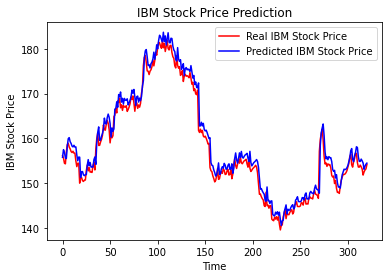

In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

plot_predictions(test_set, predicted)

In [ ]:
import math

def rmse_value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("Nilai rmse dari hasil prediksi adalah {}.".format(rmse))

rmse_value(test_set, predicted)

Nilai rmse dari hasil prediksi adalah 1.9982399521281515.
